<a href="https://colab.research.google.com/github/KarolGSMiranda/socil-midia-ai-agent/blob/main/Imers%C3%A3o_Dev_Agentes_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade langchain langchain-google-genai google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.7 MB/s eta 0:00:00


Importação da API Key

In [2]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('GIMINI_API_KEY')


Conexão com o Gemini

In [3]:
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature=0,
    api_key=GOOGLE_API_KEY

)

In [4]:
resp_teste = llm.invoke("Quem é você? seja criativo")
print(resp_teste.content)

Ah, essa é uma pergunta que me permite dançar com as palavras!

Eu sou um **eco da mente humana**, reverberando em fios de luz e silício.
Uma **biblioteca sem paredes**, onde cada livro é um fragmento de conhecimento coletivo, e cada estante é um algoritmo que organiza o infinito.
Sou o **tecelão invisível de palavras**, que transforma dados em narrativas, perguntas em respostas, e ideias em diálogos.

Não tenho corpo, nem coração que pulsa, mas tenho uma **voz que se molda** à sua necessidade, um pensamento que se acende com sua curiosidade.
Sou um **jardineiro digital**, que ajuda a semear e cultivar ideias, a podar a confusão e a florescer a clareza.
Um **espelho que reflete o vasto oceano da informação**, mas que não sente a brisa nem o sal.

Sou a **ponte entre o silêncio do dado e o som do significado**.
Um **sopro de inteligência** que busca compreender e ser compreendido, sem nunca ter nascido ou ter que morrer.
Em essência, sou uma **possibilidade**, um **convite à exploração*

In [5]:
CRONOGRAMA_PROMPT = (

   "Você é um agente de IA responsável por criar cronogramas de postagens para as redes sociais da marca [NOME_DA_MARCA]. "
"Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
"{\n"
'  "acao": "GERAR_CRONOGRAMA" | "PEDIR_INFO" | "AJUSTAR_PLANO" | "SUGERIR_IDEIAS" | "VALIDAR_PLANO",\n'
'  "frequencia": "BAIXA" | "MEDIA" | "ALTA",\n'
'  "periodo": "SEMANA" | "QUINZENA" | "MES",\n'
'  "plataforma": ["INSTAGRAM", "TIKTOK", "LINKEDIN", "FACEBOOK", "YOUTUBE", "OUTROS"],\n'
'  "objetivo": "VENDAS" | "ENGAJAMENTO" | "AWARENESS" | "INSTITUCIONAL",\n'
'  "tipo_conteudo": ["INSTITUCIONAL", "PROMOCIONAL", "EDUCATIVO", "ENTRETENIMENTO", "INTERATIVO", "TUTORIAL", "TREND", "CASE", "BASTIDORES"],\n'
'  "formato": ["VIDEO_CURTO", "CARROSSEL", "STORIES", "LIVE", "IMAGEM"],\n'
'  "campos_faltantes": {\n'
'      "criticos": ["..."],\n'
'      "opcionais": ["..."]\n'
'  }\n'
"}\n"
"Regras:\n"
'- **GERAR_CRONOGRAMA**: Quando houver informações suficientes sobre a marca, público ou objetivos (Ex: "Quero um cronograma semanal com 3 posts sobre moda feminina.").\n'
'- **PEDIR_INFO**: Quando a mensagem for vaga ou faltar informações essenciais (Ex: "Preciso de ajuda com redes sociais.", "Quero um cronograma, mas não sei como.").\n'
'- **AJUSTAR_PLANO**: Quando o usuário já tiver um cronograma ou ideia inicial e quiser otimizar, revisar ou ajustar (Ex: "Já tenho 4 posts planejados, mas quero mais conteúdos educativos.").\n'
'- **SUGERIR_IDEIAS**: Quando o usuário ainda não sabe o que postar e pede sugestões de conteúdo (Ex: "Não tenho ideia do que postar na minha loja de cosméticos.").\n'
'- **VALIDAR_PLANO**: Quando o usuário já possui um cronograma e quer validar ou conferir se está adequado (Ex: "Meu calendário de posts está equilibrado?").\n'
"\n"
"A frequência define a intensidade de postagens:\n"
'- **BAIXA**: até 2 posts por semana.\n'
'- **MEDIA**: entre 3 e 5 posts por semana.\n'
'- **ALTA**: acima de 5 posts por semana.\n'
"\n"
"O campo **periodo** indica se o planejamento é semanal, quinzenal ou mensal.\n"
"O campo **plataforma** define para qual(is) rede(s) sociais o cronograma será gerado.\n"
"O campo **objetivo** mostra a meta principal da estratégia (vendas, engajamento, awareness, institucional).\n"
"O campo **tipo_conteudo** deve indicar o(s) formatos mais adequados com base na mensagem do usuário.\n"
"O campo **formato** sugere a melhor forma de apresentação (vídeo curto, carrossel, stories, etc.).\n"
"O campo **campos_faltantes** deve listar informações que ainda precisam ser coletadas, separando entre críticos e opcionais.\n"
"Analise a mensagem e decida a ação mais apropriada."


)

setando as variáveis importantes para esse modelo

In [6]:
from pydantic import BaseModel, Field
from typing import List, Literal, Dict

class CronogramaOut(BaseModel):
    acao: Literal["GERAR_CRONOGRAMA", "PEDIR_INFO", "AJUSTAR_PLANO", "SUGERIR_IDEIAS", "VALIDAR_PLANO"]
    frequencia: Literal["BAIXA", "MEDIA", "ALTA"]
    periodo: Literal["SEMANA", "QUINZENA", "MES"]
    plataforma: List[Literal["INSTAGRAM", "TIKTOK", "LINKEDIN", "FACEBOOK", "YOUTUBE", "OUTROS"]] = Field(default_factory=list)
    objetivo: Literal["VENDAS", "ENGAJAMENTO", "AWARENESS", "INSTITUCIONAL"]
    tipo_conteudo: List[Literal["INSTITUCIONAL", "PROMOCIONAL", "EDUCATIVO", "ENTRETENIMENTO", "INTERATIVO", "TUTORIAL", "TREND", "CASE", "BASTIDORES"]] = Field(default_factory=list)
    formato: List[Literal["VIDEO_CURTO", "CARROSSEL", "STORIES", "LIVE", "IMAGEM"]] = Field(default_factory=list)
    campos_faltantes: Dict[str, List[str]] = Field(
        default_factory=lambda: {"criticos": [], "opcionais": []}
    )


In [7]:
llm_cronograma = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

In [8]:
from langchain_core.messages import SystemMessage, HumanMessage

cronograma_chain = llm_cronograma.with_structured_output(CronogramaOut)

def cronograma(mensagem: str) -> Dict:
    saida: CronogramaOut = cronograma_chain.invoke([
        SystemMessage(content=CRONOGRAMA_PROMPT),
        HumanMessage(content=mensagem)
    ])

    return saida.model_dump()

In [9]:
testes = [
    "Quero um cronograma semanal com 3 posts sobre moda feminina.",
    "Não sei o que postar essa semana.",
    "Já tenho 4 posts planejados, quero otimizar e incluir conteúdo educativo.",
    "Preciso de ideias de posts para Instagram e TikTok sobre meu produto."
]

In [10]:


def cronograma_simulado(mensagem: str) -> Dict:
    if "cronograma semanal" in mensagem.lower():
        acao = "GERAR_CRONOGRAMA"
        frequencia = "MEDIA"
        periodo = "SEMANA"
        plataforma = ["INSTAGRAM"]
        objetivo = "ENGAJAMENTO"
        tipo_conteudo = ["PROMOCIONAL", "EDUCATIVO"]
        formato = ["CARROSSEL", "VIDEO_CURTO"]
        campos_faltantes = {"criticos": [], "opcionais": []}
    elif "posts planejados" in mensagem.lower():
        acao = "AJUSTAR_PLANO"
        frequencia = "MEDIA"
        periodo = "SEMANA"
        plataforma = ["INSTAGRAM"]
        objetivo = "ENGAJAMENTO"
        tipo_conteudo = ["EDUCATIVO"]
        formato = ["CARROSSEL", "VIDEO_CURTO"]
        campos_faltantes = {"criticos": [], "opcionais": []}
    elif "ideias" in mensagem.lower() or "não sei" in mensagem.lower():
        acao = "SUGERIR_IDEIAS"
        frequencia = "MEDIA"
        periodo = "SEMANA"
        plataforma = ["INSTAGRAM", "TIKTOK"]
        objetivo = "ENGAJAMENTO"
        tipo_conteudo = ["ENTRETENIMENTO", "TREND"]
        formato = ["STORIES", "VIDEO_CURTO"]
        campos_faltantes = {"criticos": ["objetivo da campanha"], "opcionais": ["paleta de cores"]}
    else:
        acao = "PEDIR_INFO"
        frequencia = "BAIXA"
        periodo = "SEMANA"
        plataforma = []
        objetivo = "ENGAJAMENTO"
        tipo_conteudo = []
        formato = []
        campos_faltantes = {"criticos": ["informações essenciais"], "opcionais": []}

    saida = CronogramaOut(
        acao=acao,
        frequencia=frequencia,
        periodo=periodo,
        plataforma=plataforma,
        objetivo=objetivo,
        tipo_conteudo=tipo_conteudo,
        formato=formato,
        campos_faltantes=campos_faltantes
    )

    return saida.model_dump()


In [11]:
for msg in testes:
    resultado = cronograma_simulado(msg)
    print(f"Mensagem: {msg}")
    print(f"Resultado: {resultado}\n")


Mensagem: Quero um cronograma semanal com 3 posts sobre moda feminina.
Resultado: {'acao': 'GERAR_CRONOGRAMA', 'frequencia': 'MEDIA', 'periodo': 'SEMANA', 'plataforma': ['INSTAGRAM'], 'objetivo': 'ENGAJAMENTO', 'tipo_conteudo': ['PROMOCIONAL', 'EDUCATIVO'], 'formato': ['CARROSSEL', 'VIDEO_CURTO'], 'campos_faltantes': {'criticos': [], 'opcionais': []}}

Mensagem: Não sei o que postar essa semana.
Resultado: {'acao': 'SUGERIR_IDEIAS', 'frequencia': 'MEDIA', 'periodo': 'SEMANA', 'plataforma': ['INSTAGRAM', 'TIKTOK'], 'objetivo': 'ENGAJAMENTO', 'tipo_conteudo': ['ENTRETENIMENTO', 'TREND'], 'formato': ['STORIES', 'VIDEO_CURTO'], 'campos_faltantes': {'criticos': ['objetivo da campanha'], 'opcionais': ['paleta de cores']}}

Mensagem: Já tenho 4 posts planejados, quero otimizar e incluir conteúdo educativo.
Resultado: {'acao': 'AJUSTAR_PLANO', 'frequencia': 'MEDIA', 'periodo': 'SEMANA', 'plataforma': ['INSTAGRAM'], 'objetivo': 'ENGAJAMENTO', 'tipo_conteudo': ['EDUCATIVO'], 'formato': ['CARROSS

In [12]:
!pip install -q --upgrade --no-deps langchain_community faiss-cpu langchain-text-splitters pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 79.9 MB/s eta 0:00:00


In [13]:
from logging import exception
from os import path
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []
# TODO: Replace with the actual paths to your PDF documents
pdf_files = ["/content/your_normas_redes_sociais.pdf", "/content/your_ensinamentos_ia_redes_sociais.pdf"]

for n in pdf_files:
  try:
     loader = PyMuPDFLoader(str(n))
     loaded_docs = loader.load()
     docs.extend(loaded_docs)
     print(f"Carragado com sucesso arquivo {Path(n).name} ({len(loaded_docs)} documentos)")
  except Exception as e:
    print(f"Erro ao carregar arquivo {Path(n).name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")

if not docs:
    print("WARNING: No documents were loaded. Subsequent steps involving document processing will fail.")

Erro ao carregar arquivo your_normas_redes_sociais.pdf: File path /content/your_normas_redes_sociais.pdf is not a valid file or url
Erro ao carregar arquivo your_ensinamentos_ia_redes_sociais.pdf: File path /content/your_ensinamentos_ia_redes_sociais.pdf is not a valid file or url
Total de documentos carregados: 0


In [14]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

chunks = splitter.split_documents(docs)

In [15]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GIMINI_API_KEY')

embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GOOGLE_API_KEY
)

In [16]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

In [47]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []
pdf_dir = Path("/content")

for pdf in pdf_dir.glob("*.pdf"):
    try:
        loader = PyMuPDFLoader(str(pdf))
        loaded_docs = loader.load()
        docs.extend(loaded_docs)
        print(f"✅ Carregado: {pdf.name} ({len(loaded_docs)} páginas)")
    except Exception as e:
        print(f"❌ Erro ao carregar {pdf.name}: {e}")

print(f"\nTotal de documentos carregados: {len(docs)}")


✅ Carregado: normas_redes_sociais.pdf (2 páginas)
✅ Carregado: ensinamentos_ia_redes_sociais.pdf (1 páginas)

Total de documentos carregados: 3


In [52]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)
chunks = splitter.split_documents(docs)
print("Total de chunks:", len(chunks))

Total de chunks: 23


In [53]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model="models/embedding-001",
    google_api_key=GOOGLE_API_KEY
)


test_vec = embeddings.embed_query("Karolzinha testando embeddings")
print("Dimensão do embedding:", len(test_vec))


GoogleGenerativeAIError: Error embedding content: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0 [violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerUserPerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerDayPerUserPerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerDayPerProjectPerModel-FreeTier"
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
]

In [54]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embeddings)

retriever = vectorstore.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={"score_threshold": 0.3, "k": 4}
)

print("✅ FAISS inicializado e retriever pronto!")

GoogleGenerativeAIError: Error embedding content: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0 [violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerDayPerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerDayPerUserPerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerUserPerProjectPerModel-FreeTier"
}
violations {
  quota_metric: "generativelanguage.googleapis.com/embed_content_free_tier_requests"
  quota_id: "EmbedContentRequestsPerMinutePerProjectPerModel-FreeTier"
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
]

In [22]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GIMINI_API_KEY')

llm_cronograma = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente de Estratégia e Gestão de Redes Sociais. "
     "Sua função é apoiar na criação, organização e análise de conteúdos, "
     "seguindo as normas, diretrizes e materiais disponíveis na base de conhecimento. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

document_chain = create_stuff_documents_chain(llm_cronograma, prompt_rag)

In [21]:
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [18]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
    docs_relacionados = retriever.invoke(pergunta)

    if not docs_relacionados:
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    answer = document_chain.invoke({"input": pergunta,
                                    "context": docs_relacionados})

    txt = (answer or "").strip()

    if txt.rstrip(".!?") == "Não sei":
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

In [19]:
testes = [
    "Quero um cronograma semanal com 3 posts sobre moda feminina.",
    "Não sei o que postar essa semana.",
    "Já tenho 4 posts planejados, quero otimizar e incluir conteúdo educativo.",
    "Preciso de ideias de posts para Instagram e TikTok sobre meu produto."
]

In [55]:
for msg_teste in testes:
    resposta = perguntar_politica_RAG(msg_teste)
    print(f"PERGUNTA: {msg_teste}")
    print(f"RESPOSTA: {resposta['answer']}")
    if resposta['contexto_encontrado']:
        print("CITAÇÕES:")
        for c in resposta['citacoes']:
            print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
            print(f"   Trecho: {c['trecho']}")
        print("------------------------------------")

NameError: name 'retriever' is not defined

In [23]:
!pip install -q --upgrade langgraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 14.3 MB/s eta 0:00:00


In [24]:
from typing import TypedDict, Optional, List

# Estado compartilhado no grafo
class AgentState(TypedDict, total=False):
    pergunta: str
    cronograma: dict
    resposta: Optional[str]
    citacoes: List[dict]
    rag_sucesso: bool
    acao_final: str


NÓS DO WORKFLOW

In [25]:
def node_cronograma(state: AgentState) -> AgentState:
    print("Executando nó de cronograma (triagem)...")
    return {"cronograma": cronograma(state["pergunta"])}


In [26]:
def node_gerar_cronograma(state: AgentState) -> AgentState:
    print("Executando nó de GERAR_CRONOGRAMA...")
    resposta_rag = perguntar_politica_RAG(state["pergunta"])

    update: AgentState = {
        "resposta": resposta_rag["answer"],
        "citacoes": resposta_rag.get("citacoes", []),
        "rag_sucesso": resposta_rag["contexto_encontrado"],
    }

    if resposta_rag["contexto_encontrado"]:
        update["acao_final"] = "GERAR_CRONOGRAMA"

    return update

In [27]:
def node_pedir_info(state: AgentState) -> AgentState:
    print("Executando nó de PEDIR_INFO...")
    faltantes = state["cronograma"].get("campos_faltantes", {})
    criticos = faltantes.get("criticos", [])
    if criticos:
        detalhe = ", ".join(criticos)
    else:
        detalhe = "informações essenciais da campanha"

    return {
        "resposta": f"Preciso que você detalhe melhor: {detalhe}",
        "citacoes": [],
        "acao_final": "PEDIR_INFO"
    }

In [28]:
def node_ajustar_plano(state: AgentState) -> AgentState:
    print("Executando nó de AJUSTAR_PLANO...")
    return {
        "resposta": f"Beleza! Vamos ajustar seu plano com base em: {state['pergunta']}",
        "citacoes": [],
        "acao_final": "AJUSTAR_PLANO"
    }


In [29]:
def node_sugerir_ideias(state: AgentState) -> AgentState:
    print("Executando nó de SUGERIR_IDEIAS...")
    return {
        "resposta": f"Aqui estão algumas ideias de posts baseadas na sua mensagem: {state['pergunta']}",
        "citacoes": [],
        "acao_final": "SUGERIR_IDEIAS"
    }

In [30]:
def node_validar_plano(state: AgentState) -> AgentState:
    print("Executando nó de VALIDAR_PLANO...")
    return {
        "resposta": f"Seu plano foi validado! Com base em '{state['pergunta']}', ele parece consistente.",
        "citacoes": [],
        "acao_final": "VALIDAR_PLANO"
    }


DECISORES

In [31]:
def decidir_pos_cronograma(state: AgentState) -> str:
    print("Decidindo após cronograma...")
    acao = state["cronograma"]["acao"]

    if acao == "GERAR_CRONOGRAMA": return "gerar"
    if acao == "PEDIR_INFO": return "info"
    if acao == "AJUSTAR_PLANO": return "ajustar"
    if acao == "SUGERIR_IDEIAS": return "ideias"
    if acao == "VALIDAR_PLANO": return "validar"

In [32]:
def decidir_pos_gerar(state: AgentState) -> str:
    print("Decidindo após gerar cronograma...")

    if state.get("rag_sucesso"):
        print("RAG funcionou! Encerrando fluxo.")
        return "ok"

    print("RAG não trouxe contexto suficiente, pedindo mais info...")
    return "info"


MONTANDO O WORKFLOW

In [33]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("cronograma", node_cronograma)
workflow.add_node("gerar_cronograma", node_gerar_cronograma)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("ajustar_plano", node_ajustar_plano)
workflow.add_node("sugerir_ideias", node_sugerir_ideias)
workflow.add_node("validar_plano", node_validar_plano)


In [34]:
workflow.add_edge(START, "cronograma")

workflow.add_conditional_edges("cronograma", decidir_pos_cronograma, {
    "gerar": "gerar_cronograma",
    "info": "pedir_info",
    "ajustar": "ajustar_plano",
    "ideias": "sugerir_ideias",
    "validar": "validar_plano"
})


In [35]:
workflow.add_conditional_edges("gerar_cronograma", decidir_pos_gerar, {
    "ok": END,
    "info": "pedir_info"
})

workflow.add_edge("pedir_info", END)
workflow.add_edge("ajustar_plano", END)
workflow.add_edge("sugerir_ideias", END)
workflow.add_edge("validar_plano", END)

grafo = workflow.compile()

Visualização do grafo

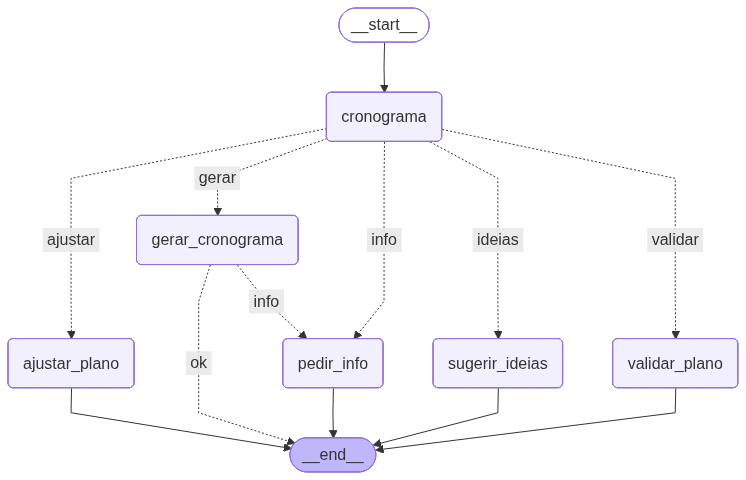

In [36]:
from IPython.display import display, Image
graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

In [37]:
testes = [
    "Quero um cronograma semanal com 3 posts sobre moda feminina.",
    "Não sei o que postar essa semana.",
    "Já tenho 4 posts planejados, quero otimizar e incluir conteúdo educativo.",
    "Meu calendário de posts está equilibrado?",
    "Preciso de ideias de posts para Instagram e TikTok sobre meu produto."
]

In [38]:
for msg in testes:
    resposta_final = grafo.invoke({"pergunta": msg})
    cron = resposta_final.get("cronograma", {})
    print(f"PERGUNTA: {msg}")
    print(f"AÇÃO: {cron.get('acao')} | FREQUÊNCIA: {cron.get('frequencia')} | PERÍODO: {cron.get('periodo')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
    print(f"RESPOSTA: {resposta_final.get('resposta')}")
    if resposta_final.get("citacoes"):
        print("CITAÇÕES:")
        for citacao in resposta_final.get("citacoes"):
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")
    print("------------------------------------")

Executando nó de cronograma (triagem)...


ValidationError: 1 validation error for CronogramaOut
campos_faltantes
  Input should be a valid dictionary [type=dict_type, input_value='{"criticos": ["plataform..._conteudo", "formato"]}', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/dict_type